# Statistic Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('2008_swing_states.csv')
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


Text(0, 0.5, "Obama's total voice percentage")

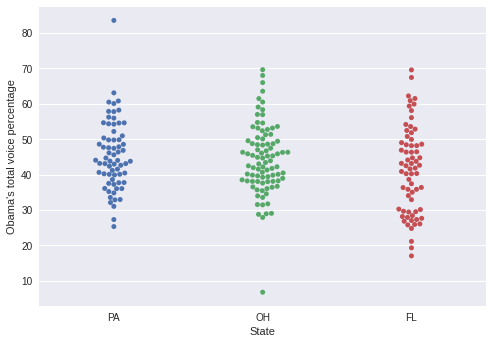

In [3]:
sns.swarmplot(x='state', y='dem_share', data=df)
plt.xlabel('State')
plt.ylabel('Obama\'s total voice percentage')

## Mean

In [4]:
state_name = ['PA', 'OH', 'FL']
state_data = []
for x in state_name:
    data = df[df['state'] == x]['dem_share']
    state_data.append(data)

In [5]:
for i, x in enumerate(state_data):
    print("Mean from %s is : %s" % (state_name[i], np.mean(x)))

Mean from PA is : 45.476417910447765
Mean from OH is : 44.31818181818181
Mean from FL is : 41.32507462686568


In [6]:
np.mean(df['dem_share'])

43.76441441441444

## Outlier

In [7]:
df_all = pd.read_csv('2008_all_states.csv')
df_all.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [8]:
data_ut = df_all[df_all['state'] == 'UT']['dem_share']

Text(0, 0.5, 'Voices for Obama')

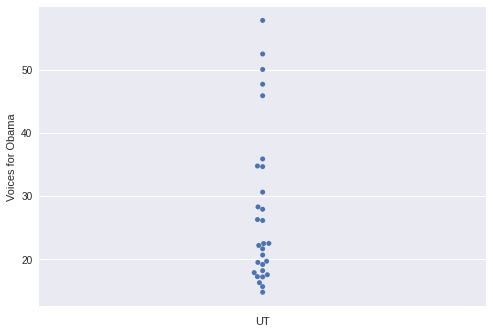

In [9]:
sns.swarmplot(y=data_ut)
plt.xlabel('UT')
plt.ylabel('Voices for Obama')

In [10]:
np.mean(data_ut)

27.61103448275862

In [11]:
np.median(data_ut)

22.47

In [14]:
np.array(sorted(data_ut))

array([14.76, 15.64, 16.27, 17.18, 17.23, 17.53, 17.86, 18.17, 19.15,
       19.48, 19.67, 20.65, 21.64, 22.17, 22.47, 22.49, 26.12, 26.27,
       27.9 , 28.27, 30.61, 34.65, 34.75, 35.87, 45.88, 47.7 , 50.04,
       52.49, 57.81])

In [15]:
len(data_ut)

29

## Percentage on ECDF

In [18]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [19]:
x, y = ecdf(df['dem_share'])

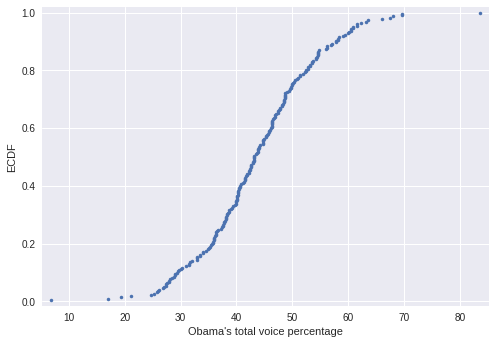

In [20]:
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Obama\'s total voice percentage')
plt.ylabel('ECDF')
plt.margins(0.02)

In [21]:
np.percentile(df['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

## Box plot

Text(0, 0.5, 'Obama percentage')

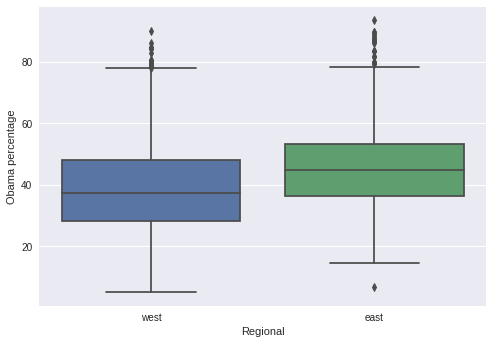

In [22]:
sns.boxplot(x='east_west', y='dem_share', data=df_all)
plt.xlabel('Regional')
plt.ylabel('Obama percentage')

## Varians and Standard Deviation

Text(0, 0.5, 'Obama percentage')

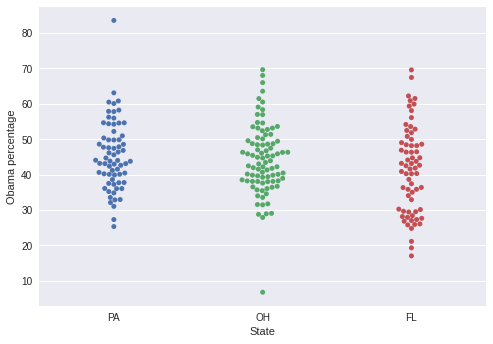

In [24]:
sns.swarmplot(x='state', y='dem_share', data=df)
plt.xlabel('State')
plt.ylabel('Obama percentage')

## Varians
- Distance between square root from mean
- Basically it is data measurement

In [25]:
data_pa = df[df['state'] == 'PA']['dem_share']
data_oh = df[df['state'] == 'OH']['dem_share']
data_fl = df[df['state'] == 'FL']['dem_share']

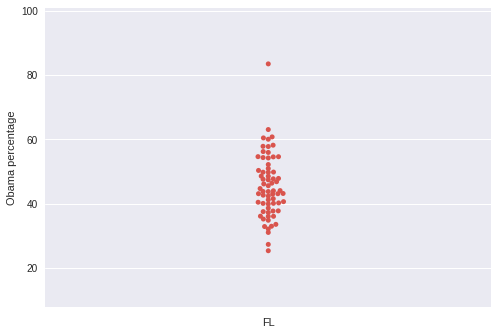

In [27]:
sns.swarmplot(y=data_pa, color=sns.xkcd_rgb['pale red'])
plt.xlabel('FL')
plt.ylabel('Obama percentage')
plt.margins(0.3)

In [28]:
np.var(data_pa)

94.66503492982848

In [29]:
print(np.std(data_pa))
print(np.sqrt(np.var(data_fl)))

9.729595825615187
12.142602117687158


## Covarian and Corelation Coeficient Pearson

In [30]:
df_all.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


Text(0, 0.5, 'Obama percentage')

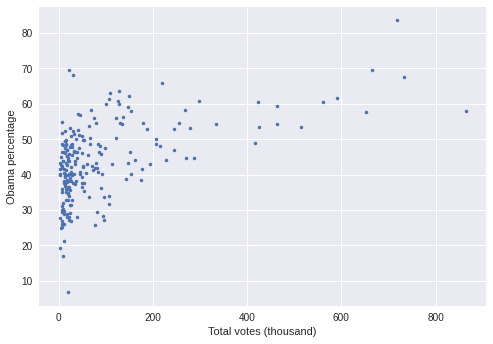

In [31]:
plt.plot(df['total_votes']/1000, df['dem_share'], marker='.', linestyle='none')
plt.xlabel('Total votes (thousand)')
plt.ylabel('Obama percentage')

Text(0, 0.5, 'Obama percentage')

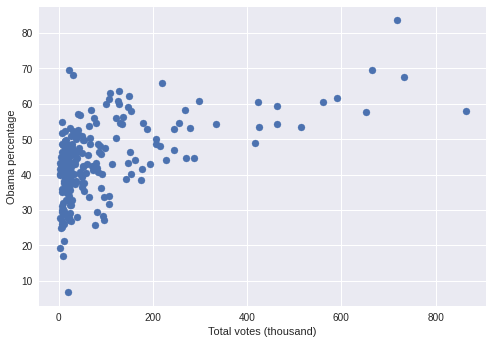

In [33]:
plt.scatter(df['total_votes']/1000, df['dem_share'])
plt.xlabel('Total votes (thousand)')
plt.ylabel('Obama percentage')

## Covarians
- Measuring 2 variables with same variation

In [34]:
np.cov(df['total_votes']/1000, df['dem_share'])[0,1]

817.3093618405288

## Corelation Coeficient Pearson

In [36]:
np.cov(df['total_votes']/1000, df['dem_share']) / (np.std(df['total_votes']/1000) * np.std(df['dem_share']))

array([[13.34193785,  0.5386236 ],
       [ 0.5386236 ,  0.07563146]])

In [37]:
np.corrcoef(df['total_votes']/1000, df['dem_share'])

array([[1.        , 0.53619736],
       [0.53619736, 1.        ]])

In [38]:
from scipy.stats import pearsonr

In [39]:
pearsonr(df['total_votes']/1000, df['dem_share'])

(0.536197364958678, 6.338911568323671e-18)